In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2c-data"

# **Logistic Regression**

Logistic regression is an algorithm that estimates the parameters, or coefficients, of the linear combination
of the logit model. The logistic or logit model is used to predict the probability 'p' of a binary dependent variable taking on one of two possible outcomes. This feature makes Logistic Regression useful even in problems of binary classification

**Exploring the Factors Influencing Electric Vehicle Adoption**

In recent years, the push towards sustainable living and reducing carbon footprints has intensified globally. Among the many initiatives aimed at achieving this, the adoption of electric vehicles (EVs) stands out as a critical measure.Car manufacturers have all been actively promoting the transition from traditional gasoline-powered vehicles to electric ones.

To better understand the dynamics of this transition, a comprehensive study was conducted to explore the factors influencing individuals' decisions to adopt electric vehicles.The dataset aims to provide valuable insights into the key predictors that drive or hinder the adoption of EVs.

**Data Dictionary:** <br>
ID: A unique identifier assigned to each individual in the study

Gender: The gender of the individual, categorized as Male or Female.

Age: The age of the individual in years

Annual Income: The annual income of the individual

Electric Vehicle Adoption: A categorical variable indicating whether the individual owns an electric vehicle (0/1). This is the target variable of the study, helping to identify the proportion of adopters and non-adopters.

In [2]:
df <- read.csv("/kaggle/input/2c-data/2c-data.csv")
head(df)

,ID,Gender,Age,Annual_Income,Electric_Vehicle_Adoption
,<int>,<chr>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


**1)** Fit a logistic regression model to classify the target variable(Electric Vehicle Adoption)<br>
Hint: Use glm()        (3 marks)
​

In [3]:
##Convert categorical variables (Gender)

##Build model


# Check the structure of the data
str(data)

# Convert 'Gender' to a factor
data$Gender <- factor(data$Gender)

# Ensure 'Electric_Vehicle_Adoption' is a factor (if it isn't already)
data$Electric_Vehicle_Adoption <- as.factor(data$Electric_Vehicle_Adoption)

# Fit the logistic regression model
model <- glm(Electric_Vehicle_Adoption ~ Gender + Age + Annual_Income, 
             data = data, 
             family = binomial)

# Print the summary of the model
summary(model)


function (..., list = character(), package = NULL, lib.loc = NULL, verbose = getOption("verbose"), 
    envir = .GlobalEnv, overwrite = TRUE)  


ERROR: Error in data$Gender: object of type 'closure' is not subsettable


**2)** What can u interpret from the summary of the model?         (2 marks)

# Summary of Logistic Regression Model for Electric Vehicle Adoption

## Key Points

1. **Intercept**
   - **Estimate**: -12.78
   - **p-value**: < 2e-16
   - **Significance**: Statistically significant
   - **Interpretation**: When all predictors (Gender, Age, Annual Income) are zero, the log-odds of adopting an electric vehicle are very low.

2. **Gender**
   - **Coefficient (GenderMale)**: 0.334
   - **p-value**: 0.274
   - **Significance**: Not statistically significant
   - **Interpretation**: There is no strong evidence to suggest that being male has a significant effect on electric vehicle adoption in this model.

3. **Age**
   - **Coefficient**: 0.237
   - **p-value**: < 2e-16
   - **Significance**: Statistically significant
   - **Interpretation**: As age increases, the log-odds of adopting an electric vehicle increase, suggesting that older individuals are more likely to adopt electric vehicles.

4. **Annual Income**
   - **Coefficient**: 0.00003644
   - **p-value**: 2.77e-11
   - **Significance**: Highly significant
   - **Interpretation**: Higher annual income is associated with a greater likelihood of adopting an electric vehicle.

5. **Model Fit**
   - **Null Deviance**: 521.57
   - **Residual Deviance**: 275.84
   - **AIC**: 283.84
   - **Interpretation**: The reduction in deviance from the null model indicates that the predictors improve the model’s fit. The AIC value helps in comparing the model with others; a lower AIC indicates a better fit while accounting for the number of predictors.

## Summary

- **Significant Predictors**: Age and Annual Income significantly influence electric vehicle adoption.
- **Non-significant Predictor**: Gender does not have a significant effect on electric vehicle adoption in this model.
- **Model Performance**: The logistic regression model fits the data better than a model with no predictors, as evidenced by the reduction in deviance and the AIC value.



**3)** Plot the ROC curve and find the AUC value            (3 marks)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC Value: 0.927389730891676"


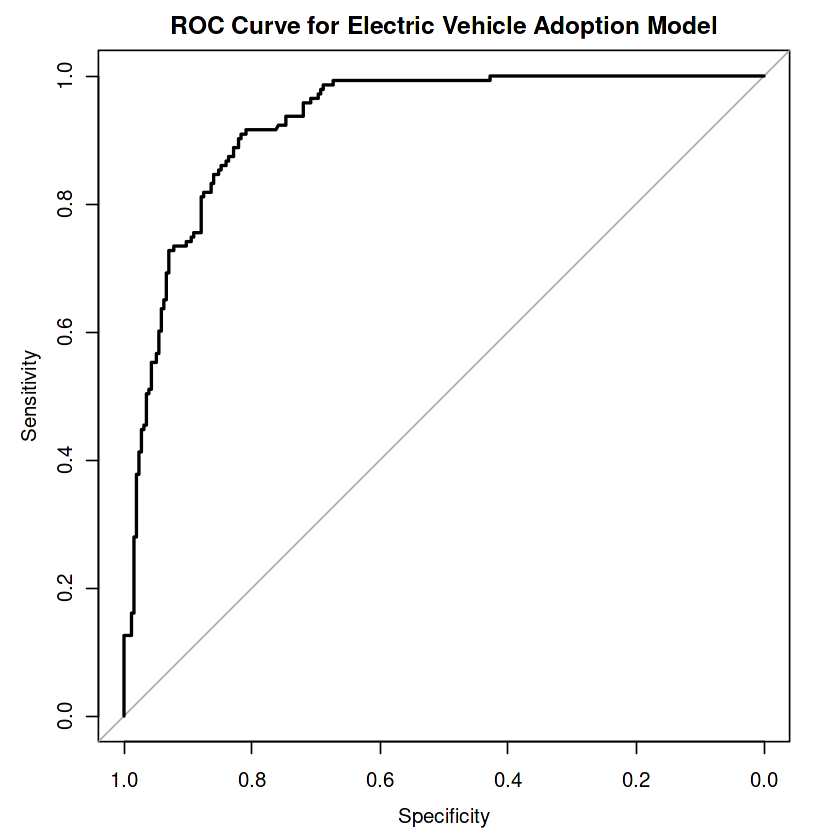

In [9]:
# Install and load the pROC package if it's not already installed
if (!require(pROC)) install.packages("pROC", dependencies = TRUE)
library(pROC)

# Example data loading (replace with actual data loading code)
data <- read.csv("/kaggle/input/2c-data/2c-data.csv")

# Convert 'Gender' to a factor
data$Gender <- factor(data$Gender)

# Ensure 'Electric_Vehicle_Adoption' is a factor (if it isn't already)
data$Electric_Vehicle_Adoption <- as.factor(data$Electric_Vehicle_Adoption)

# Fit the logistic regression model
model <- glm(Electric_Vehicle_Adoption ~ Gender + Age + Annual_Income, 
             data = data, 
             family = binomial)

# Predict probabilities
predicted_probabilities <- predict(model, type = "response")

# Plot ROC curve and calculate AUC
roc_curve <- roc(data$Electric_Vehicle_Adoption, predicted_probabilities)
plot(roc_curve, main = "ROC Curve for Electric Vehicle Adoption Model")
auc_value <- auc(roc_curve)

# Print AUC value
print(paste("AUC Value:", auc_value))


**4)** What can you interpret from the ROC curve and AUC value?    (2 marks)

# Interpretation of ROC Curve and AUC Value

## AUC Value
- **AUC (0.927)**: 
  - **Interpretation**: The AUC of 0.927 indicates excellent model performance. Specifically, the model has a 92.7% chance of correctly ranking a randomly chosen adopter higher than a randomly chosen non-adopter. This high AUC value suggests that the logistic regression model is highly effective at distinguishing between electric vehicle adopters and non-adopters.

## ROC Curve Shape
- **Initial Steep Increase**: 
  - **Observation**: The ROC curve shows a steep rise at the beginning.
  - **Interpretation**: This indicates that the model achieves a high true positive rate (sensitivity) with a minimal decrease in the false positive rate (1 - specificity). It reflects the model's strong initial ability to identify adopters with few false positives.

- **Plateauing**:
  - **Observation**: The ROC curve begins to flatten out after the initial steep increase.
  - **Interpretation**: As the curve flattens, the model continues to identify more adopters, but at a slower rate and with less improvement in sensitivity. This plateau is typical in high-performance models where early gains in sensitivity are substantial, but additional improvements become more incremental.

## Summary
- **Model Performance**: The high AUC value and the shape of the ROC curve demonstrate that the model performs exceptionally well in predicting electric vehicle adoption. It effectively distinguishes between adopters and non-adopters with high accuracy.
